The Goal
I am to figure out which year of students is more likely to have exprience trouble with mental health and somehow correlate it with stress.

This was a very interesting Analysis just because I have always wondered why are students on their final years are more relax as to oppose to students in their first and with this analysis I was to able to see it in a bigger picture.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from pandasql import sqldf

student_mental_health_data = pd.read_csv('/kaggle/input/student-mental-health/Student Mental health.csv')
student_mental_health_data

new_columns = ['Time','Gender','Age','Course','Year','CGPA','Marriage','Depression','Anxiety','Panic','Treatment']

student_mental_health_data.columns=new_columns

pd.set_option('display.max_rows', None)

student_mental_health_data


,Time,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
5,8/7/2020 12:31,Male,19.0,Engineering,Year 2,3.50 - 4.00,No,No,No,Yes,No
6,8/7/2020 12:32,Female,23.0,Pendidikan islam,year 2,3.50 - 4.00,Yes,Yes,No,Yes,No
7,8/7/2020 12:33,Female,18.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
8,8/7/2020 12:35,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No


In [2]:
student_mental_health_data.isna().sum()

Time          0
Gender        0
Age           1
Course        0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

*Looking at the data it seemed that there is a missing number in Age and we should clean that up*

In [3]:
student_mental_health_data_cleaned = student_mental_health_data.dropna()
student_mental_health_data_cleaned.isna().sum()

Time          0
Gender        0
Age           0
Course        0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

In [4]:
# Let's write an SQL Like Query

query = "SELECT Gender, Age, Course, Year, CGPA FROM student_mental_health_data_cleaned WHERE Gender = 'Male'"
pysqldf = lambda q: sqldf(q, globals())
# Let us Execute the query and print the results
result = pysqldf(query)
print(result)

   Gender   Age              Course    Year         CGPA
0    Male  21.0   Islamic education  year 2  3.00 - 3.49
1    Male  19.0                 BIT  Year 1  3.00 - 3.49
2    Male  23.0        Mathemathics  year 4  3.00 - 3.49
3    Male  19.0         Engineering  Year 2  3.50 - 4.00
4    Male  18.0               Irkhs  year 1  3.50 - 4.00
5    Male  19.0         Engineering  year 1  3.00 - 3.49
6    Male  24.0                 BCS  Year 3  3.50 - 4.00
7    Male  18.0         Engineering  Year 2  3.00 - 3.49
8    Male  18.0                 BCS  year 2  3.00 - 3.49
9    Male  19.0                 BCS  year 1  3.50 - 4.00
10   Male  18.0                 BCS  Year 2  3.50 - 4.00
11   Male  23.0               TAASL  year 2  3.50 - 4.00
12   Male  18.0                 BCS  year 1  3.50 - 4.00
13   Male  24.0                 BCS  year 2  3.00 - 3.49
14   Male  21.0                 BCS  year 1  3.00 - 3.49
15   Male  23.0              Kirkhs  Year 3  3.50 - 4.00
16   Male  19.0                

This shows data of Male students in the provided Data Set, now lets find the students that is expreiencing *Depression, Anxiety and Panic Attacks* 

In [5]:
# Let's write an SQL Like Query
query = "SELECT Gender, Age, Year, Depression, Anxiety, Panic FROM student_mental_health_data WHERE (Depression = 'Yes' OR Anxiety = 'Yes')"
pysqldf = lambda q: sqldf(q, globals())
# Let us Execute the query and print the results
result = pysqldf(query)
print(result)

    Gender   Age    Year Depression Anxiety Panic
0   Female  18.0  year 1        Yes      No   Yes
1     Male  21.0  year 2         No     Yes    No
2     Male  19.0  Year 1        Yes     Yes   Yes
3   Female  22.0  year 3        Yes      No    No
4   Female  23.0  year 2        Yes      No   Yes
5   Female  18.0  year 1         No     Yes    No
6     Male  18.0  year 1         No     Yes   Yes
7   Female  24.0  Year 3        Yes      No    No
8   Female  18.0  year 1        Yes      No    No
9   Female  18.0  Year 2         No     Yes    No
10  Female  24.0  year 4        Yes     Yes   Yes
11  Female  20.0  Year 2         No     Yes    No
12  Female  18.0  year 2        Yes     Yes   Yes
13  Female  23.0  Year 3        Yes     Yes   Yes
14    Male  18.0  Year 2        Yes     Yes    No
15  Female  24.0  Year 3        Yes     Yes   Yes
16    Male  18.0  Year 2        Yes     Yes    No
17  Female  19.0  year 1        Yes     Yes   Yes
18  Female  18.0  Year 3        Yes     Yes    No


In [6]:
query = """SELECT
    CASE WHEN UPPER(Year) = 'YEAR 1' THEN 'Year 1'
         WHEN UPPER(Year) = 'YEAR 2' THEN 'Year 2'
         WHEN UPPER(Year) = 'YEAR 3' THEN 'Year 3'
         WHEN UPPER(Year) = 'YEAR 4' THEN 'Year 4'
         ELSE Year
    END AS ProperYear,
       COUNT(*) AS TotalStudents,
       SUM(CASE WHEN (Depression = 'Yes' AND  Anxiety = 'No') THEN 1 ELSE 0 END) AS withDepression,
       SUM(CASE WHEN (Anxiety = 'Yes' AND  Depression = 'No')  THEN 1 ELSE 0 END) AS withAnxiety,
    SUM(CASE WHEN Anxiety = 'Yes' AND  Depression = 'Yes' THEN 1 ELSE 0 END) AS withBoth
FROM student_mental_health_data_cleaned
WHERE Depression = 'Yes' OR Anxiety = 'Yes'
GROUP BY ProperYear
ORDER BY TotalStudents DESC;
"""

result = pysqldf(query)
print(result)



  ProperYear  TotalStudents  withDepression  withAnxiety  withBoth
0     Year 1             21               7            7         7
1     Year 2             15               5            5         5
2     Year 3             13               5            3         5
3     Year 4              2               0            1         1


In [7]:
query = """
    SELECT
        CASE 
            WHEN UPPER(Year) = 'YEAR 1' THEN 'Year 1'
            WHEN UPPER(Year) = 'YEAR 2' THEN 'Year 2'
            WHEN UPPER(Year) = 'YEAR 3' THEN 'Year 3'
            WHEN UPPER(Year) = 'YEAR 4' THEN 'Year 4'
            ELSE Year
        END AS ProperYear,
        COUNT(*) AS TotalStudents
    FROM student_mental_health_data_cleaned
    GROUP BY ProperYear
    ORDER BY TotalStudents DESC;
"""

result = pysqldf(query)
print(result)


  ProperYear  TotalStudents
0     Year 1             42
1     Year 2             26
2     Year 3             24
3     Year 4              8


In this section we needed to further clean up the data as Year is categorized as year as well. after which we counted the the number of students based on their year to get the total number of students that is expriencing depression or anxiety

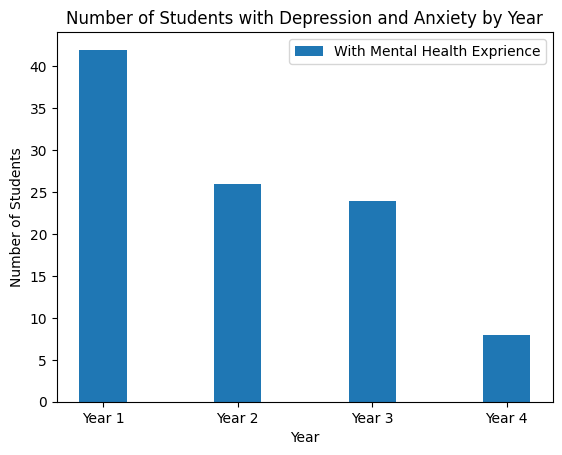

In [8]:
# Create a bar chart
fig, ax = plt.subplots()

bar_width = 0.35
bar1 = ax.bar(result['ProperYear'], result['TotalStudents'], label='With Mental Health Exprience', width=bar_width)


ax.set_xlabel('Year')
ax.set_ylabel('Number of Students')
ax.set_title('Number of Students with Depression and Anxiety by Year')
ax.legend()

plt.show()

In this chart we can determine that Students who are in their First and Second Year are more likely to exprience with Mental Health than any other year. 

>"A study done by Gretchen Geng and Richard Midford in 2015 titled "Investigating First and Second Year Education Students’ Stress
Level" provides a more insight on why this is because it was somehow related to completion of assessments because of their busy schedule at schools.
This finding corelates with the research that first and second year students’ high stress and eventualy lead to mental health issues at a stagerring high levels comes from a lack of time to study because of multiple factors as well as the ability to cope to a new and unfamilliar environment." 